In [ ]:
TASK 3: Handwritten Character Recognition

In [5]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


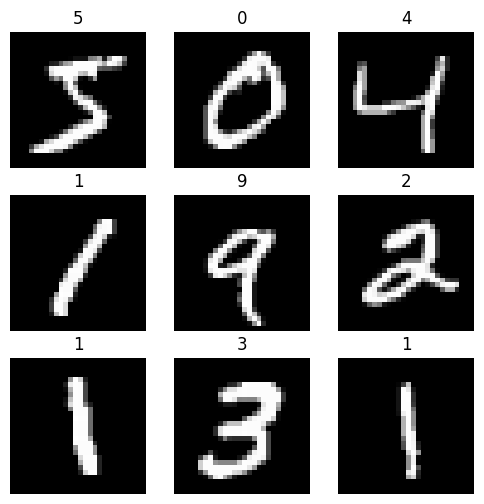

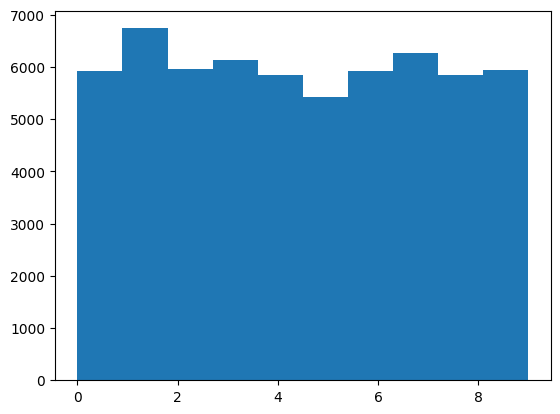

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 59s 34ms/step - accuracy: 0.9049 - loss: 0.3041 - val_accuracy: 0.9873 - val_loss: 0.0475
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 56s 33ms/step - accuracy: 0.9840 - loss: 0.0493 - val_accuracy: 0.9872 - val_loss: 0.0438
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 66s 39ms/step - accuracy: 0.9903 - loss: 0.0288 - val_accuracy: 0.9887 - val_loss: 0.0401
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 72s 33ms/step - accuracy: 0.9933 - loss: 0.0211 - val_accuracy: 0.9905 - val_loss: 0.0397
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 32ms/step - accuracy: 0.9956 - loss: 0.0136 - val_accuracy: 0.9915 - val_loss: 0.0329
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9876 - loss: 0.0351


[0.02642778307199478, 0.9908000230789185]

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(y_train[i])
    plt.axis("off")
plt.show()

plt.hist(y_train, bins=10)
plt.show()

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

model = Sequential()
model.add(Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train, y_train, epochs=5, validation_split=0.1)

model.evaluate(X_test, y_test)
